In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import sklearn.metrics
import scipy.stats
import networkx as nx
import pickle
import copy
import fortuna
sns.set()
sns.set_style("dark")

import itertools
import os

#######################
# THINGS FOR STYLE
#######################
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

rainbow_cmap = plt.cm.get_cmap('gist_rainbow')    
green_cmap = plt.cm.get_cmap('Greens')

targets = ['thrombin','tyk2','jnk1','cdk2','ptp1b','bace','mcl1','p38a']

target_colors = {}

for i, target in zip(np.linspace(0.,1.,len(targets)), targets):
    target_colors[target] = rainbow_cmap(i)

In [2]:
class Thrombin(object):
    name = 'thrombin'
    thrombin = ['1b','1d','3b','1a','6a','7a','3a','5','6b','6e','1c']
    name_to_index = {}
    index_to_name = {}
    for i,lig in enumerate(thrombin):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('1d','6e'),('1d','5'),('1b','3b'),('6a','1b'),('1b','1c'),('1d','1c'),('1b','1a'),('1a','5'),('3a','1d'),('6a','6b'),('1d','7a'),('1b','7a'),('3a','1b'),('1d','1a'),('1a','3b'),('6e','6b')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))

    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs

    
class Mcl1(object):
    name = 'mcl1'
    mcl1 = ['26','48','33','46','35','31','52','68','32','38','51','50','28','66','39','37','30','54','44','23','29','40','62','61','49','64','41','65','58','63','27','47','57','56','53','36','60','45','42','67','34','43']
    name_to_index = {}
    index_to_name = {}
    for i,lig in enumerate(mcl1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('50','60'), ('56','35'), ('65','60'), ('26','57'), ('58','60'), ('62','45'), ('60','36'), ('30','27'), ('33','27'), ('43','27'), ('67','58'), ('67','32'), ('30','40'), ('38','60'), ('41','35'), ('54','23'), ('56','60'), ('66','42'), ('29','40'), ('26','44'), ('49','35'), ('29','35'), ('42','51'), ('39','32'), ('35','37'), ('28','35'), ('35','53'), ('67','63'), ('27','45'), ('41','32'), ('67','53'), ('35','33'), ('27','46'), ('66','23'), ('67','61'), ('57','23'), ('30','35'), ('61','60'), ('67','31'), ('32','46'), ('35','60'), ('31','35'), ('62','26'), ('35','36'), ('26','64'), ('38','35'), ('35','34'), ('29','27'), ('48','27'), ('68','45'), ('63','60'), ('54','42'), ('44','23'), ('28','27'), ('67','27'), ('52','60'), ('27','23'), ('49','67'), ('28','47'), ('67','52'), ('30','48'), ('67','35'), ('32','34'), ('65','67'), ('67','50'), ('35','39'), ('43','47'), ('67','37'), ('42','64'), ('51','45'), ('68','23')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        
def check_missing_results(target,all_sims):
    still_to_run = copy.deepcopy(target.index_pairs)
    for sim in all_sims:
        lig_id_a = int(sim.ligA)
        lig_id_b = int(sim.ligB)
        still_to_run.remove((lig_id_a,lig_id_b))
    return still_to_run
    

[(9, 4), (41, 31)]
2
lig16to21


/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


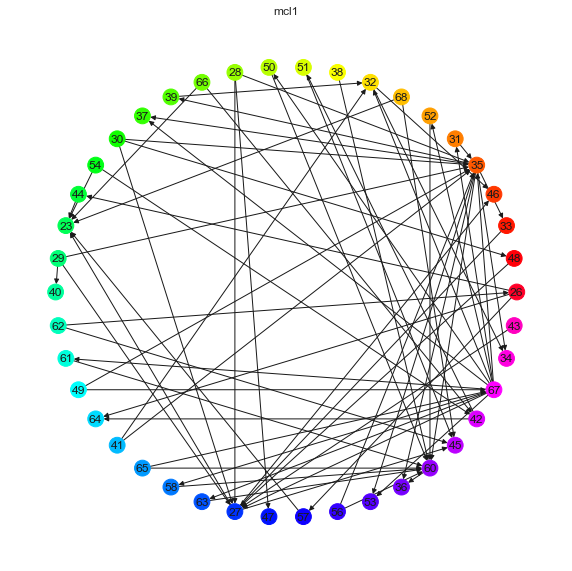

 Not all simulations are done, following data isnt complete. 
Absolutes
26, -5.26
48, 0.00
33, -5.15
46, -4.31
35, -6.00
31, -4.19
52, -8.09
68, -4.34
32, -4.22
38, -7.96
51, -5.09
50, -7.84
28, -3.51
66, -6.60
39, -4.64
37, -7.97
30, -4.35
54, -6.82
44, -5.55
23, -5.14
29, -3.08
40, -4.08
62, -4.97
61, -8.04
49, -6.47
64, -6.73
41, -6.92
65, -9.82
58, -10.19
63, -10.18
27, -3.92
47, -4.32
57, -5.11
56, -7.58
53, -10.33
36, -5.80
60, -8.43
45, -6.62
42, -4.53
67, -8.77
34, -6.05
43, -4.18

Relatives
50,60,-0.59
56,35,1.58
65,60,1.39
26,57,0.15
58,60,1.76
62,45,-1.65
60,36,2.63
30,27,0.43
33,27,1.23
43,27,0.27
67,58,-1.42
67,32,4.55
30,40,0.27
38,60,-0.47
41,35,0.92
54,23,1.68
56,60,-0.85
66,42,2.07
29,40,-1.00
26,44,-0.29
49,35,0.47
29,35,-2.92
42,51,-0.57
39,32,0.42
35,37,-1.97
28,35,-2.49
35,53,-4.33
67,63,-1.41
27,45,-2.71
41,32,2.70
67,53,-1.56
35,33,0.85
27,46,-0.40
66,23,1.46
67,61,0.74
57,23,-0.03
30,35,-1.65
61,60,-0.40
67,31,4.58
32,46,-0.09
35,60,-2.43
31,35,-1.81
62,26,-0.28

In [3]:
target = Mcl1
import os
from perses.analysis import load_simulations,cycles
import matplotlib.pyplot as plt
os.chdir(f'{target.name}/results/')

all_sims = []

all_files = os.listdir()

run = []

for file in [x for x in all_files if x[-3:] == '.pi']:
    x = pickle.load(open(file,'rb'))
    all_sims.append(x)

missing = check_missing_results(target,all_sims)
print(missing)
print(len(missing))


import networkx as nx
G = nx.DiGraph()

# thrombin
ligand_pairs = [(1, 9), (1, 7), (0, 2), (4, 0), (0, 10), (1, 10), (0, 3), (3, 7), (6, 1), (4, 8), (1, 5), (0, 5), (6, 0), (1, 3), (3, 2), (9, 8)]


for item in target.index_to_name:
    G.add_node(item,name=target.index_to_name[item])

for sim in all_sims:
    a = int(sim.ligA)
    b = int(sim.ligB)
    try:
        efficiency = np.log10(((sim.comddg**2 + sim.solddg**2)**0.5 )** -1)
        G.add_edge(a,b,f_ij=sim.bindingdg/1.69,df_ij=sim.bindingddg/1.69,efficiency=efficiency)
#         G.add_edge(b,a,f_ij=-sim.bindingdg,df_ij=sim.bindingddg,efficiency=efficiency)
    except TypeError:
        print(sim.directory)
plt.figure(figsize=(10,10))
plt.title(target.name)
nx.draw_circular(G,labels=target.index_to_name,node_color=range(len(target.index_to_name)), node_size=250, cmap=plt.cm.gist_rainbow)
plt.show()

#thrombin
base_id = 1


f_i, C = fortuna.optimize.mle(G)
f_i = [f_i[base_id]-x for x in f_i]

if len(check_missing_results(target,all_sims)) != 0:
    print(f'{color.BOLD} Not all simulations are done, following data isnt complete. {color.END}')
print('Absolutes')
for node in G.nodes(data=True):
    G.node[node[0]]['f_i'] = f_i[node[0]]
    G.node[node[0]]['df_i'] = C[node[0],node[0]]
    print(f"{node[1]['name']}, {node[1]['f_i']:.2f}")

print()
print('Relatives')    
for a,b in target.index_pairs:
    relative = f_i[b] - f_i[a]
    print(f'{target.index_to_name[a]},{target.index_to_name[b]},{relative:.2f}')

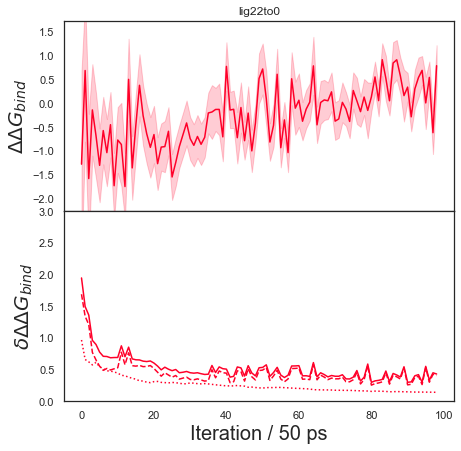

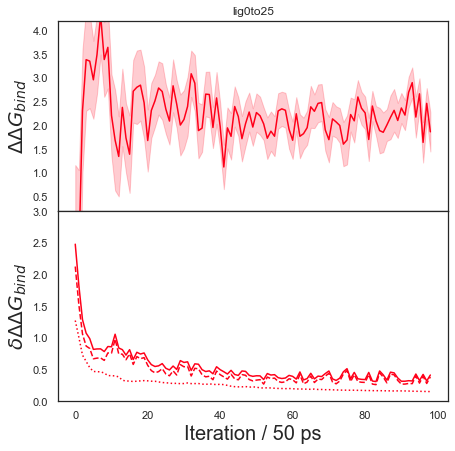

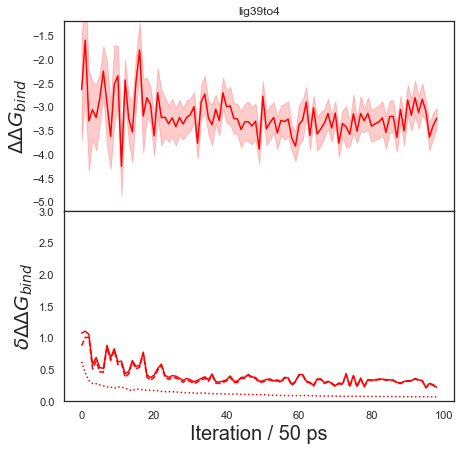

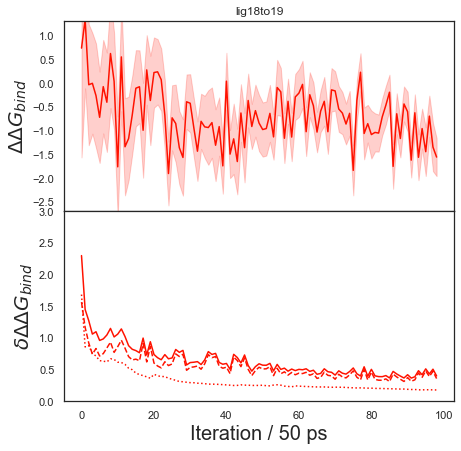

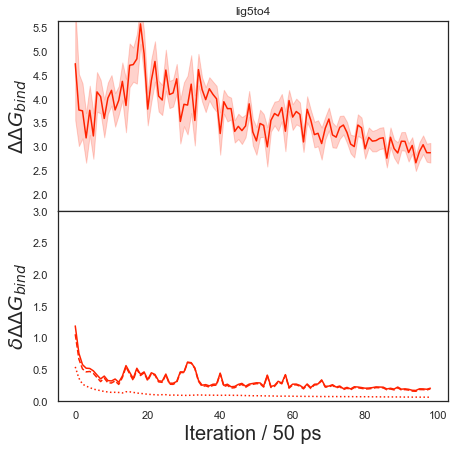

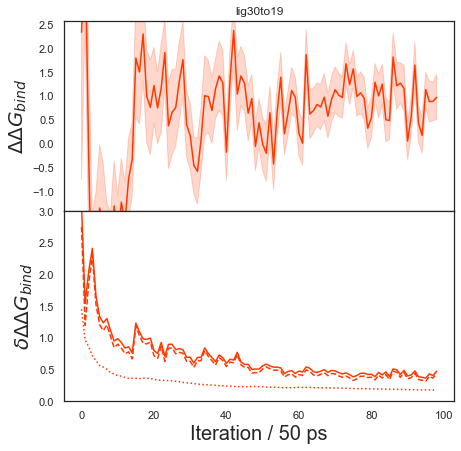

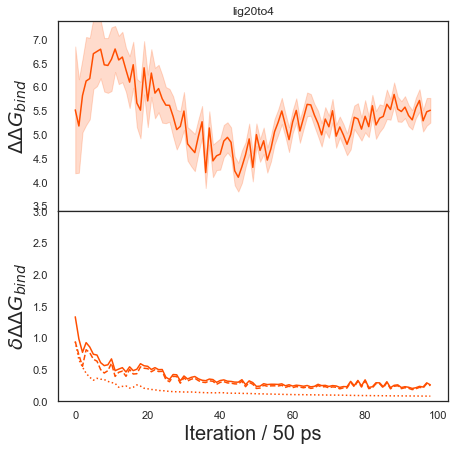

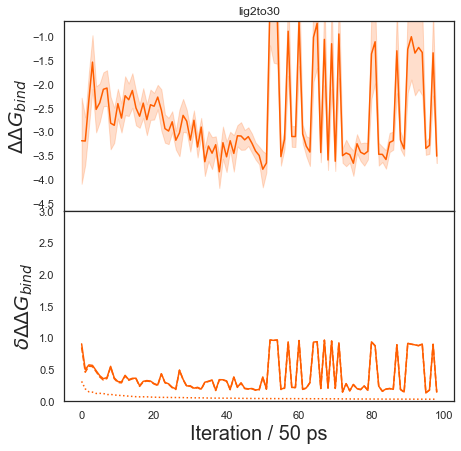

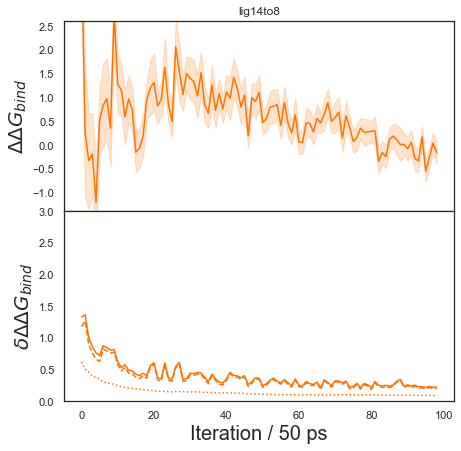

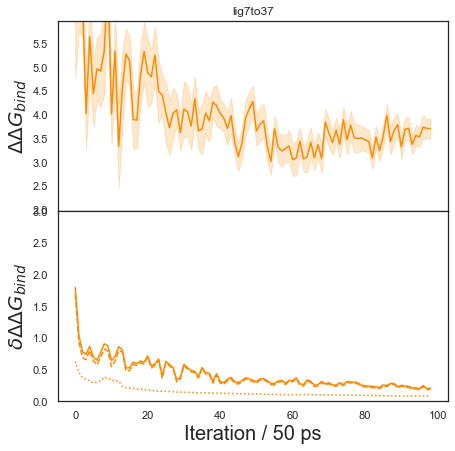

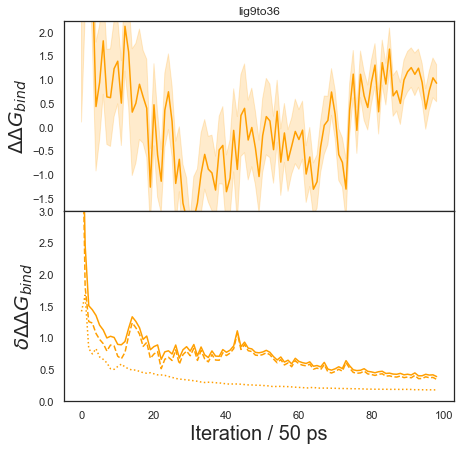

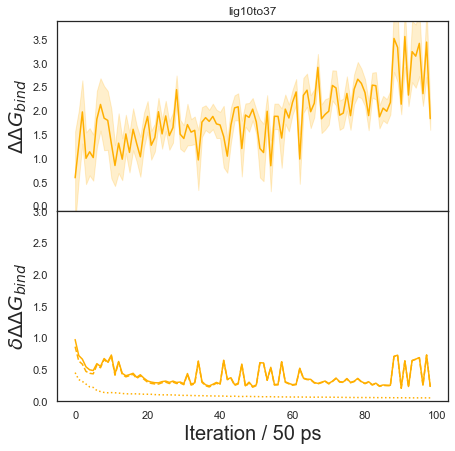

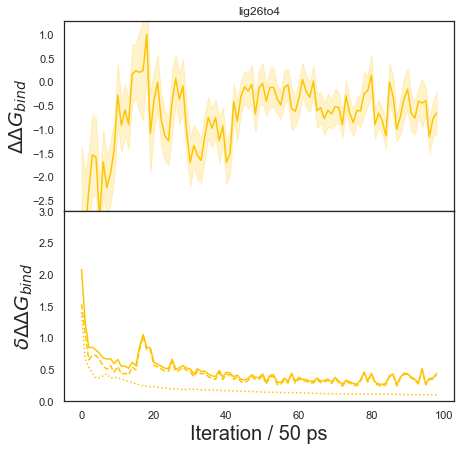

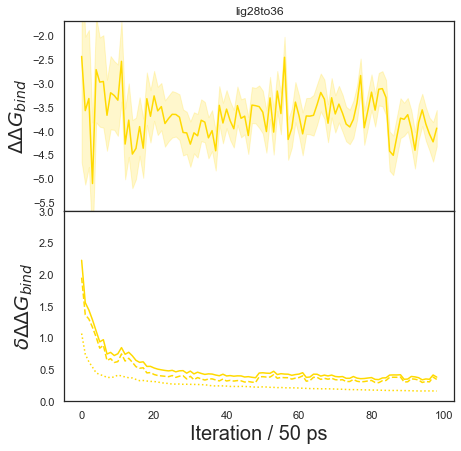

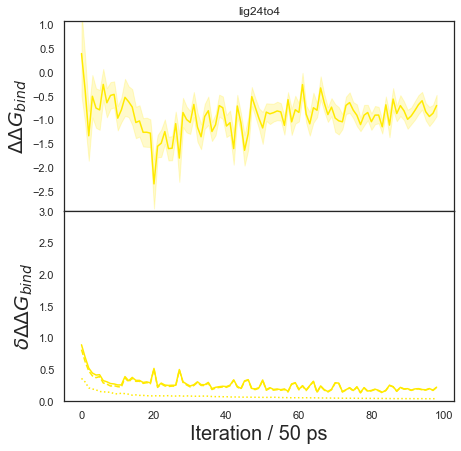

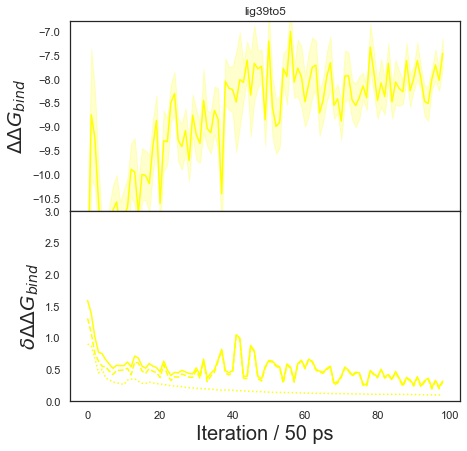

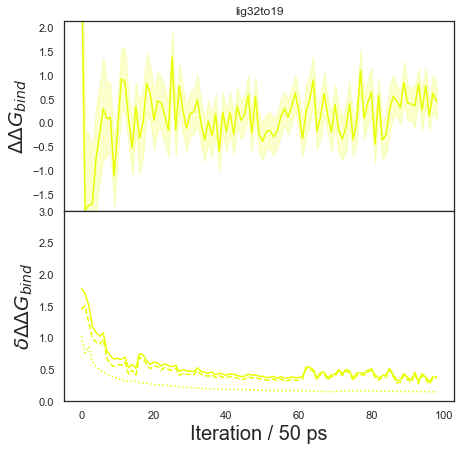

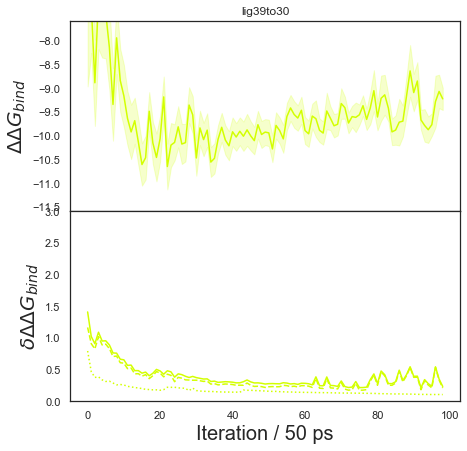

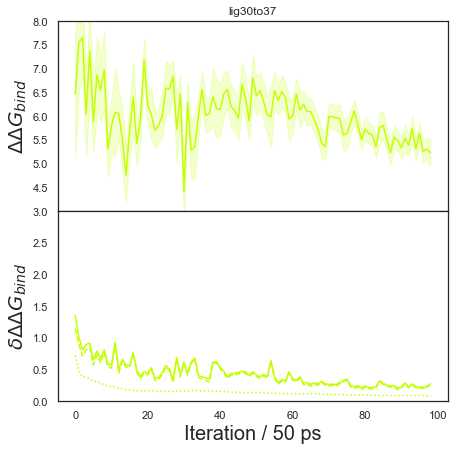

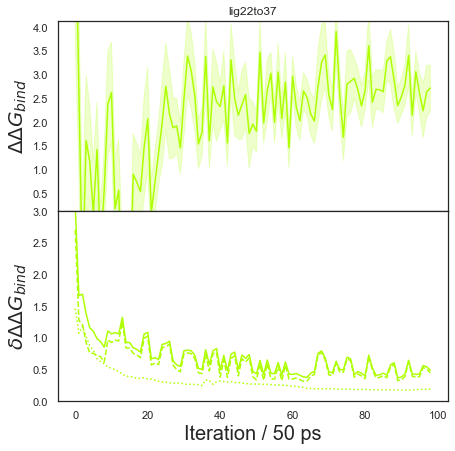

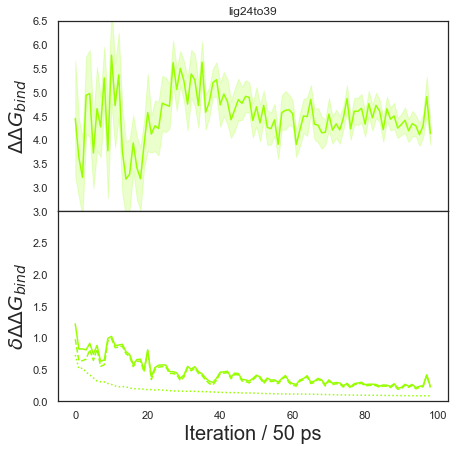

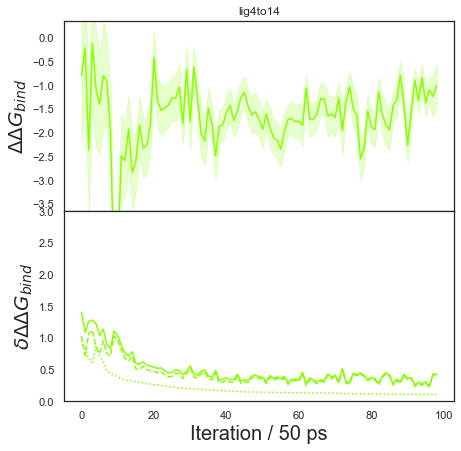

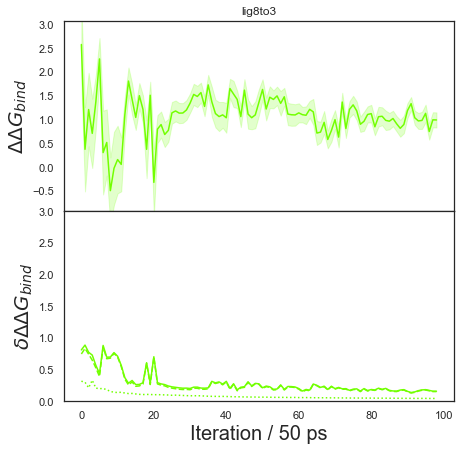

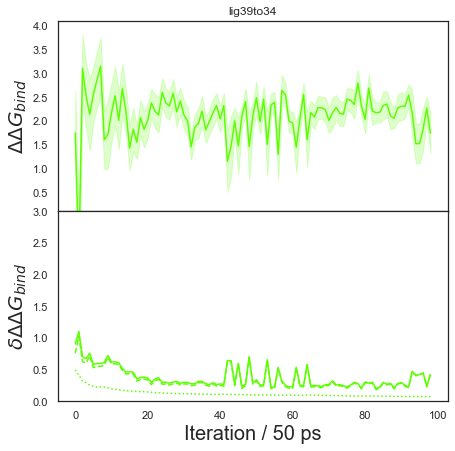

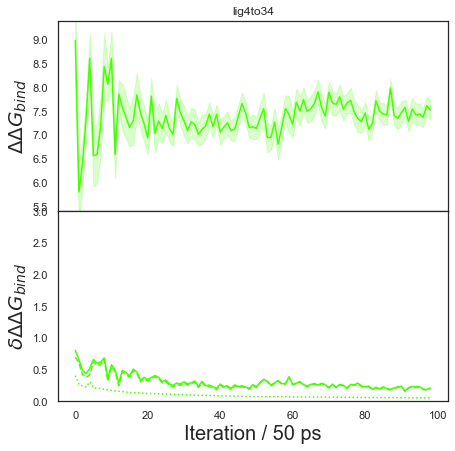

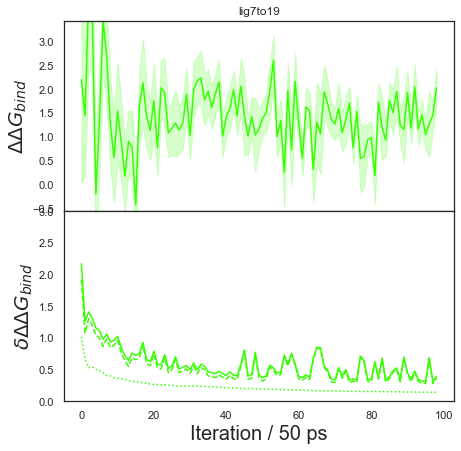

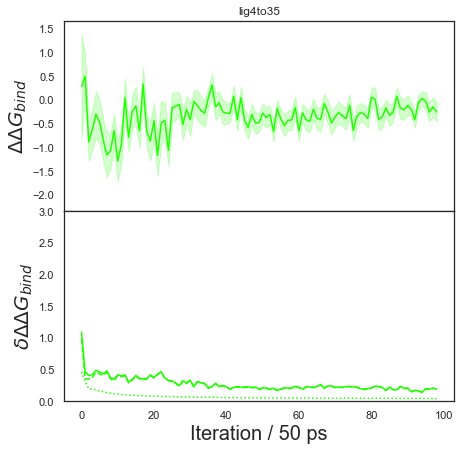

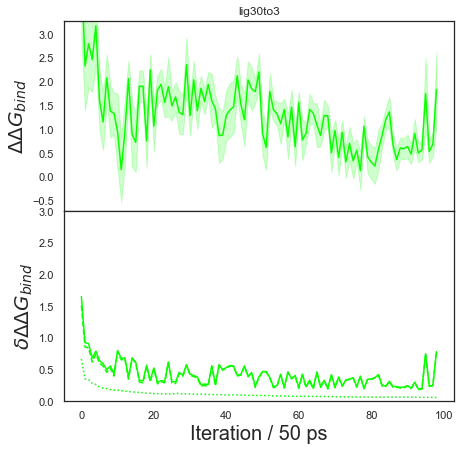

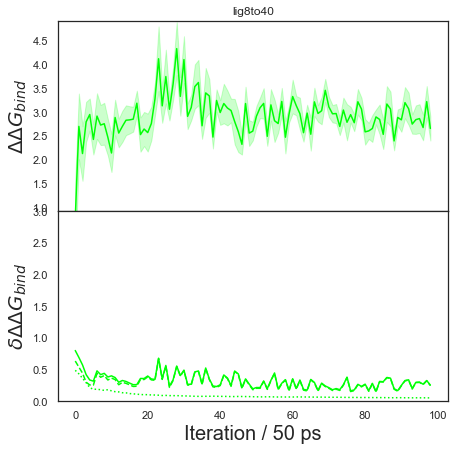

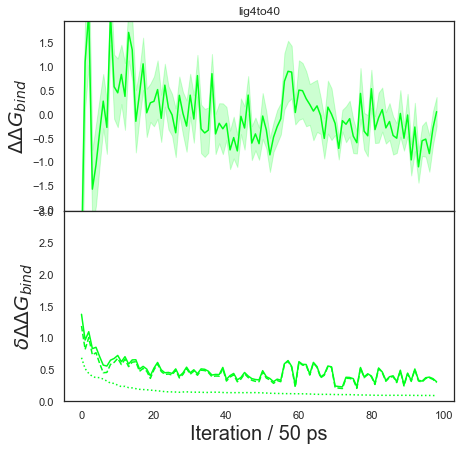

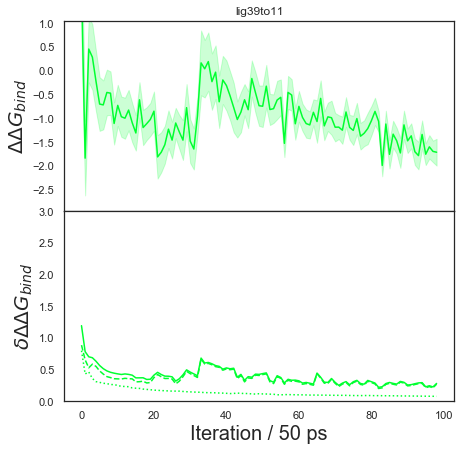

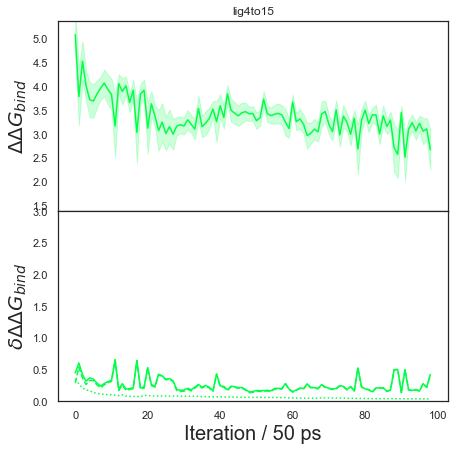

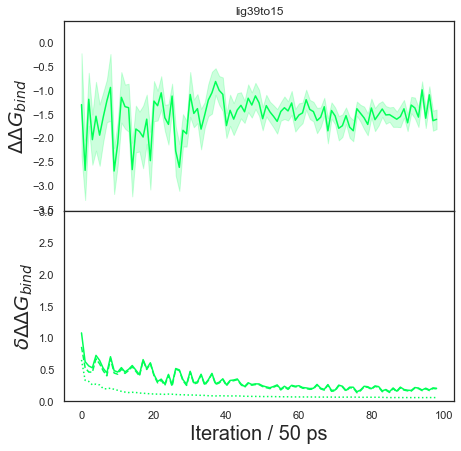

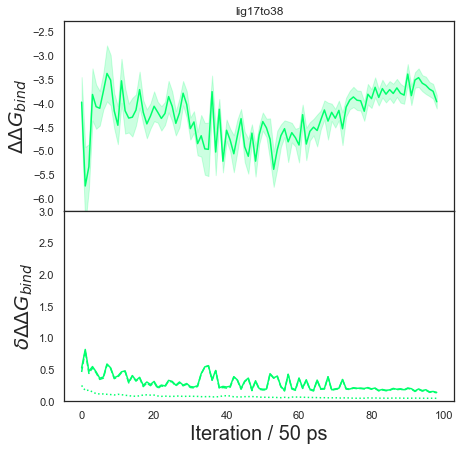

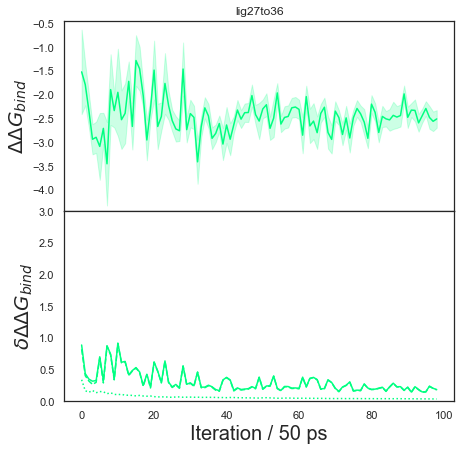

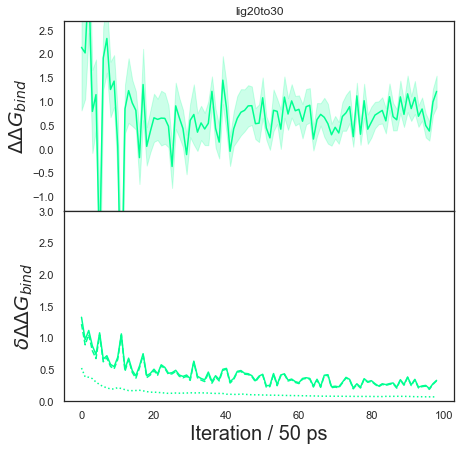

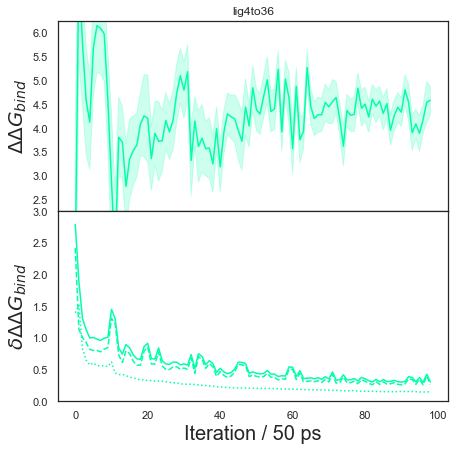

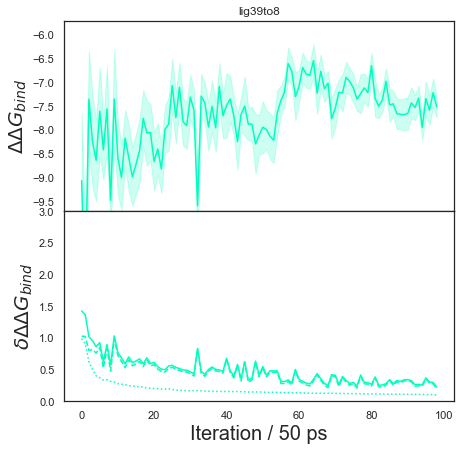

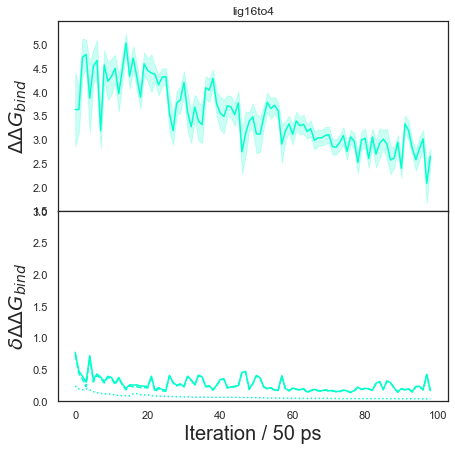

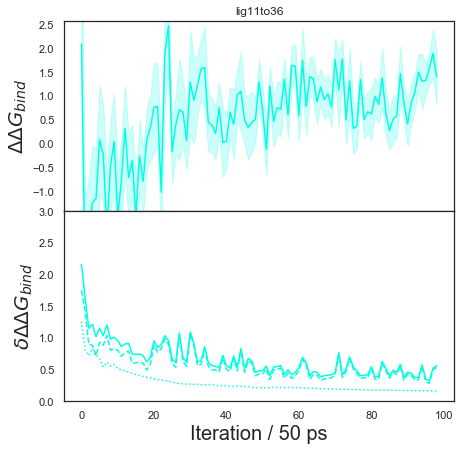

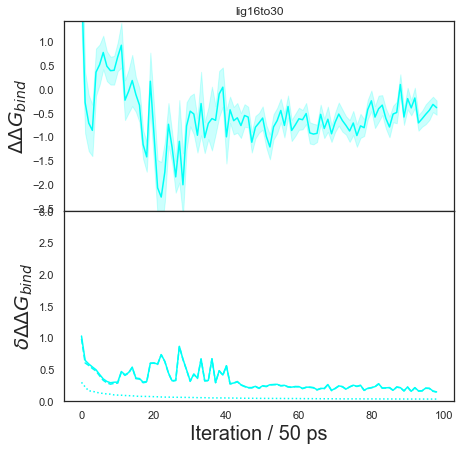

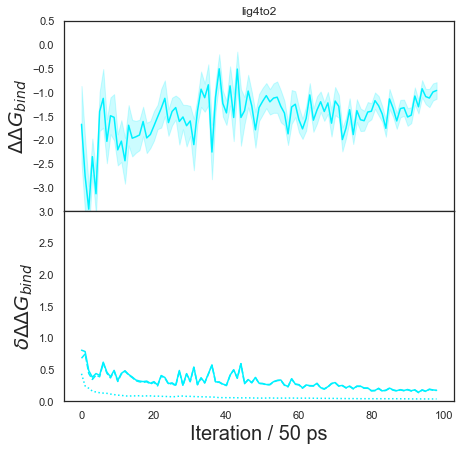

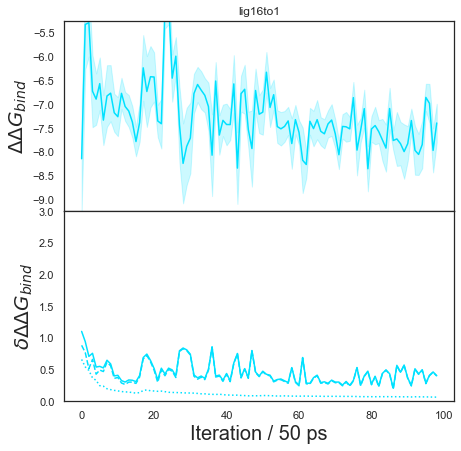

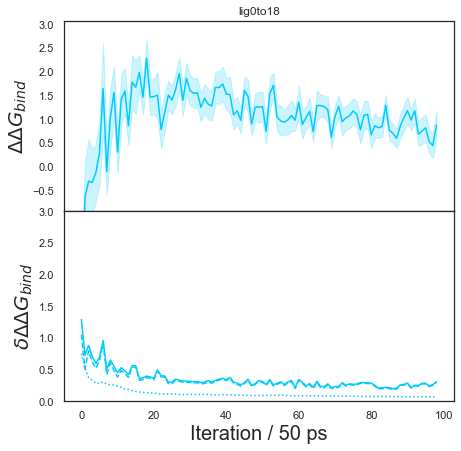

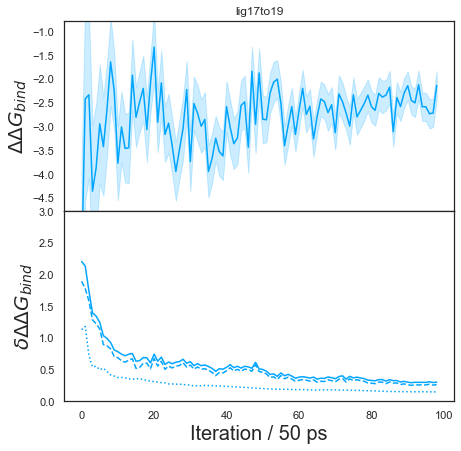

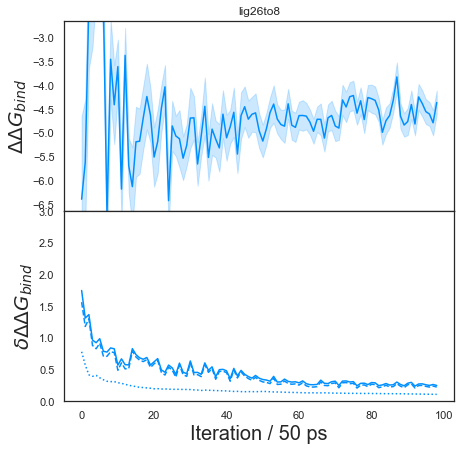

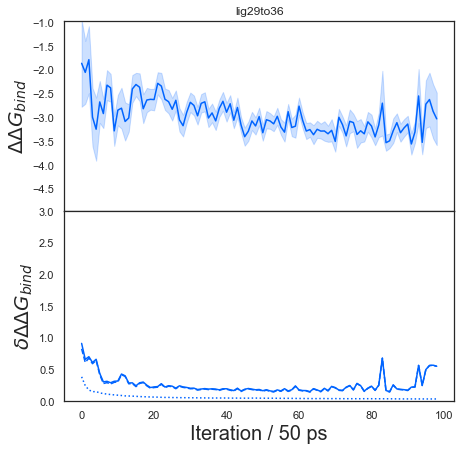

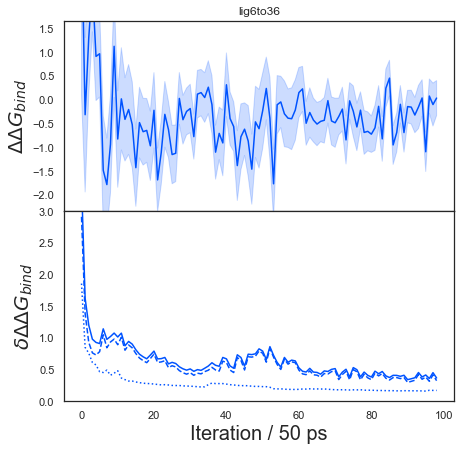

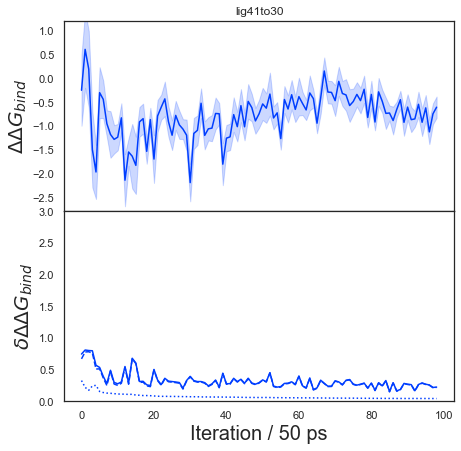

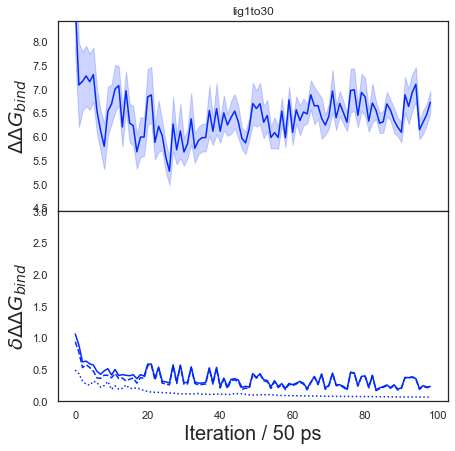

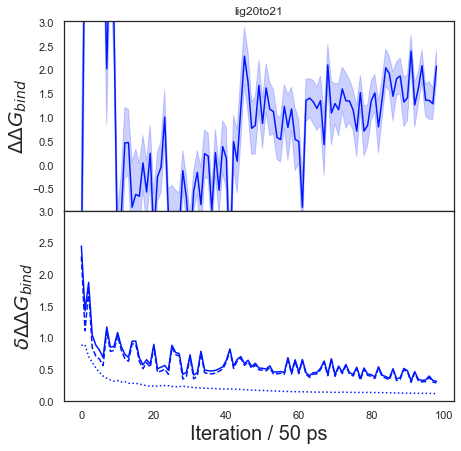

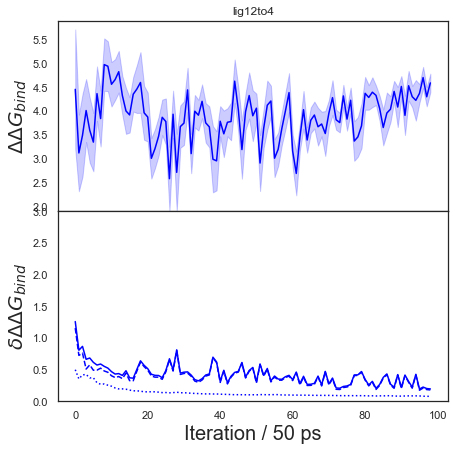

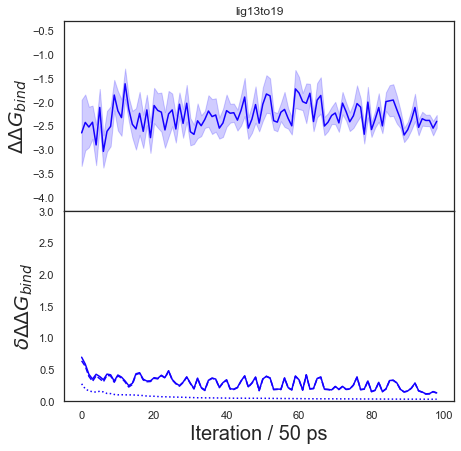

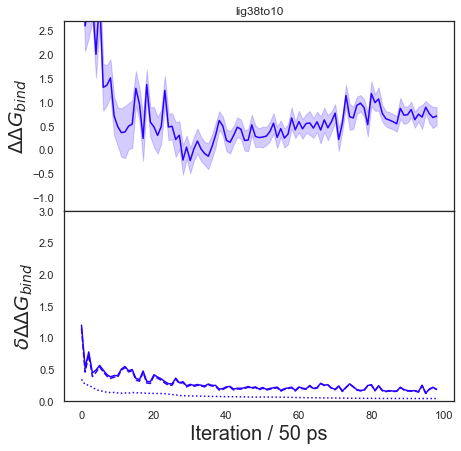

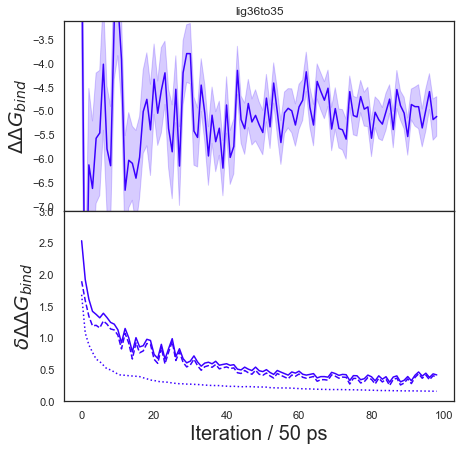

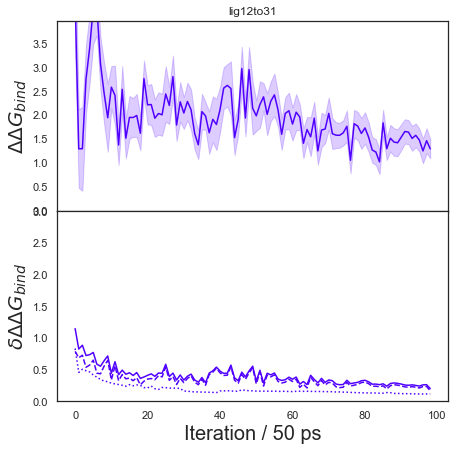

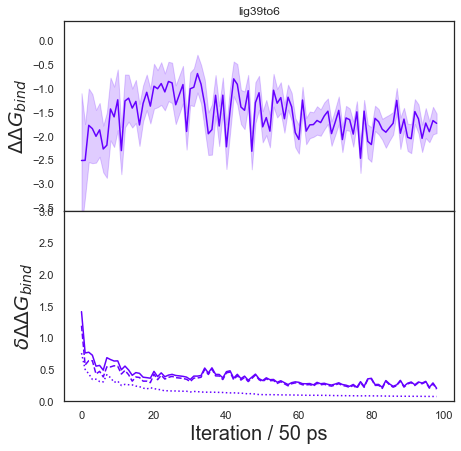

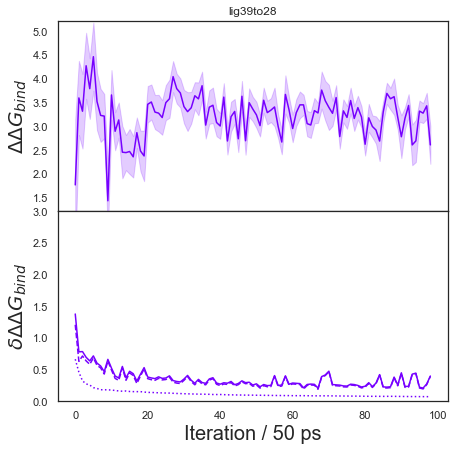

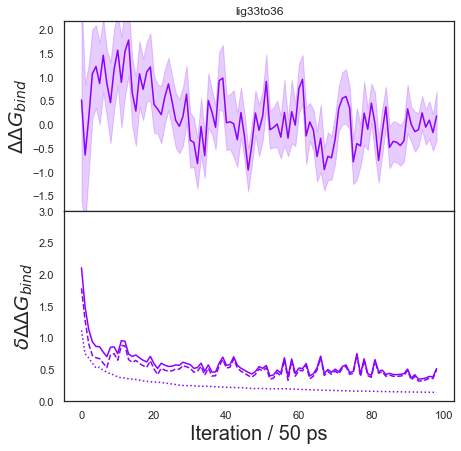

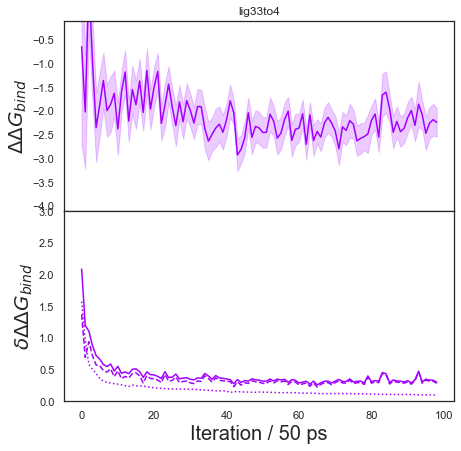

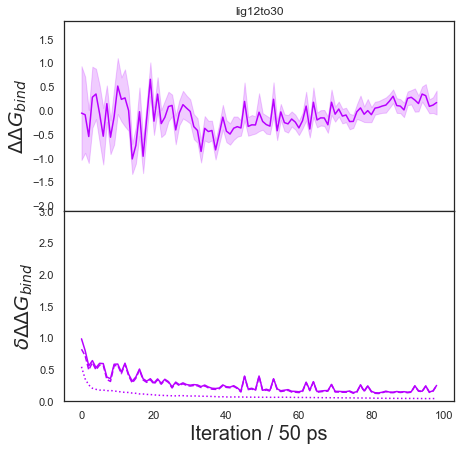

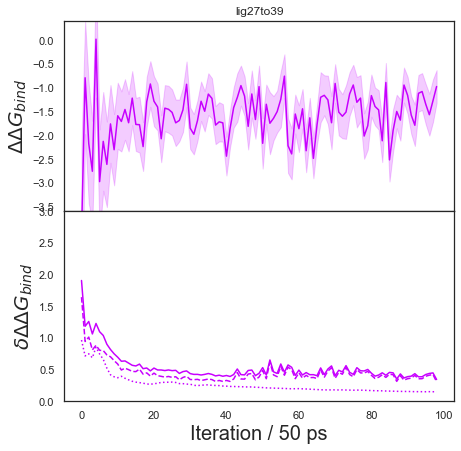

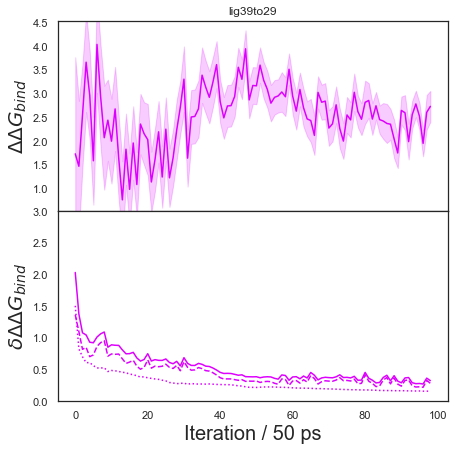

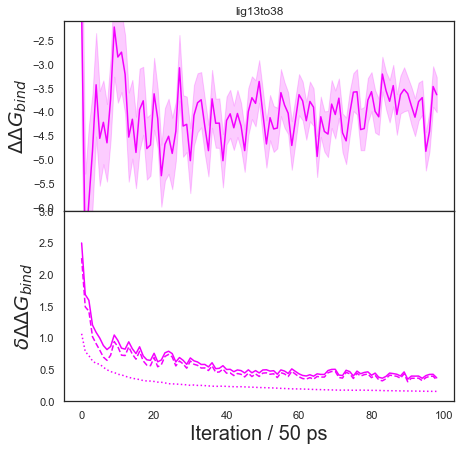

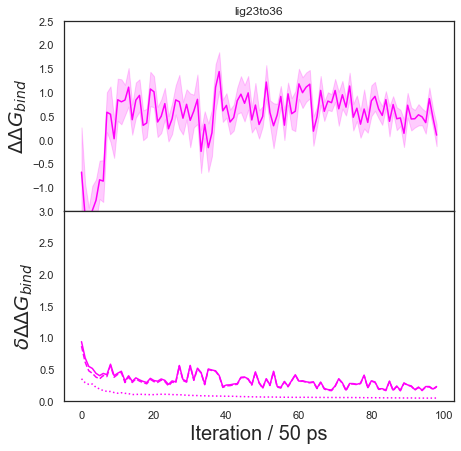

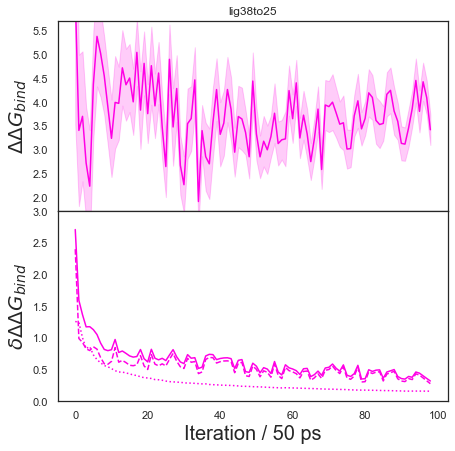

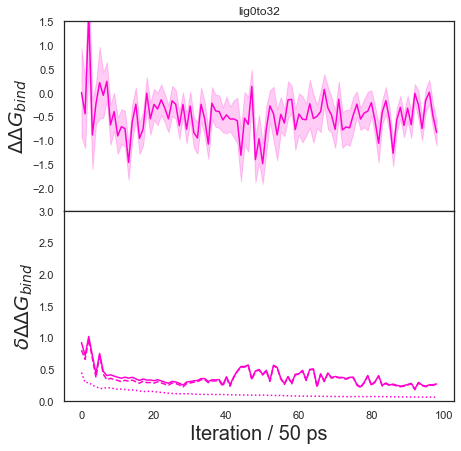

In [4]:
sns.set_style('white')

for i,sim in enumerate(all_sims):
    if len(sim.vacdg_history) == 0:
        continue
    f, (fe_fig, err_fig) = plt.subplots(2,1, sharex=True,figsize=(7,7))
    plt.subplots_adjust(hspace=0.0)
    fe_fig.set_title(f'{sim.directory}')

    bfe_history = np.asarray(sim.soldg_history) - np.asarray(sim.comdg_history)
    error_history = ((np.asarray(sim.solddg_history))**2 + (np.asarray(sim.comddg_history))**2)**0.5

    fe_fig.plot(bfe_history,color=rainbow_cmap(i/len(all_sims)))
    fe_fig.fill_between(range(len(bfe_history)),bfe_history - error_history, bfe_history + error_history, alpha = 0.2,color=rainbow_cmap(i/len(all_sims)))
    err_fig.plot(error_history,color=rainbow_cmap(i/len(all_sims)))
    err_fig.plot(sim.solddg_history,color=rainbow_cmap(i/len(all_sims)),linestyle='dotted',label='solvent')
    err_fig.plot(sim.comddg_history,color=rainbow_cmap(i/len(all_sims)),linestyle='dashed',label='complex')

    err_fig.set_ylabel(r'$\delta \Delta \Delta G_{bind}$',fontsize=20)
    fe_fig.set_ylabel(r'$\Delta \Delta G_{bind}$',fontsize=20)
    plt.xlabel('Iteration / 50 ps',fontsize=20)
    mean = np.mean(bfe_history)
    fe_fig.set_ylim(mean-2.,mean+2.)
    err_fig.set_ylim(0.,3.)
    plt.show()